In [1]:
%run functions.ipynb

unit_length: 2.64e-10 
unit_time: 1.76e-12 
unit_temperature: 1.09e+01 
unit_pressure: 8.18e+06 
unit_volume: 1.84e-29


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['figure.facecolor'] = 'white'

In [4]:
N = 200
box = [6.75, 6.75, 6.75]
temperature = 1.4

In [5]:
r_init = init_positions_random(N, box)
v_init = init_velocity_boltzmann(N, temperature)

In [6]:
while True:
    history = simulate(r_init.copy(), v_init.copy(), 0, box,
                  history=None,
                  iteration_time=0.2, dt=0.0001, record_interval=0.01)
    v_init = history["vs"][-1]  / np.sqrt(estimmate_temperature(history["vs"][-1:], box) / temperature)
    r_init = history["rs"][-1]
    et = estimmate_temperature(history["vs"], box)
    print("   estimated temperature: %0.03f" % et)
    if (abs(et - temperature) < 0.01 * temperature):
        #close 1%
        break

  0%|          | 0/2000 [00:00<?, ?it/s]

   estimated temperature: 1.989


  0%|          | 0/2000 [00:00<?, ?it/s]

   estimated temperature: 1.470


  0%|          | 0/2000 [00:00<?, ?it/s]

   estimated temperature: 1.411


In [7]:
histories = []
for dt in  [0.0001, 0.0002, 0.0005, 0.0008, 0.001, 0.002, 0.004, 0.005]:
    history = simulate(r_init.copy(), v_init.copy(), 0, box, history=None,
                       iteration_time=6, dt=dt, record_interval=0.01)
    histories.append((dt, history))

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [8]:
size = len(histories[0][1]["time"])-3

## with $(r - r_0)^2$

In [9]:
from scipy.stats import linregress

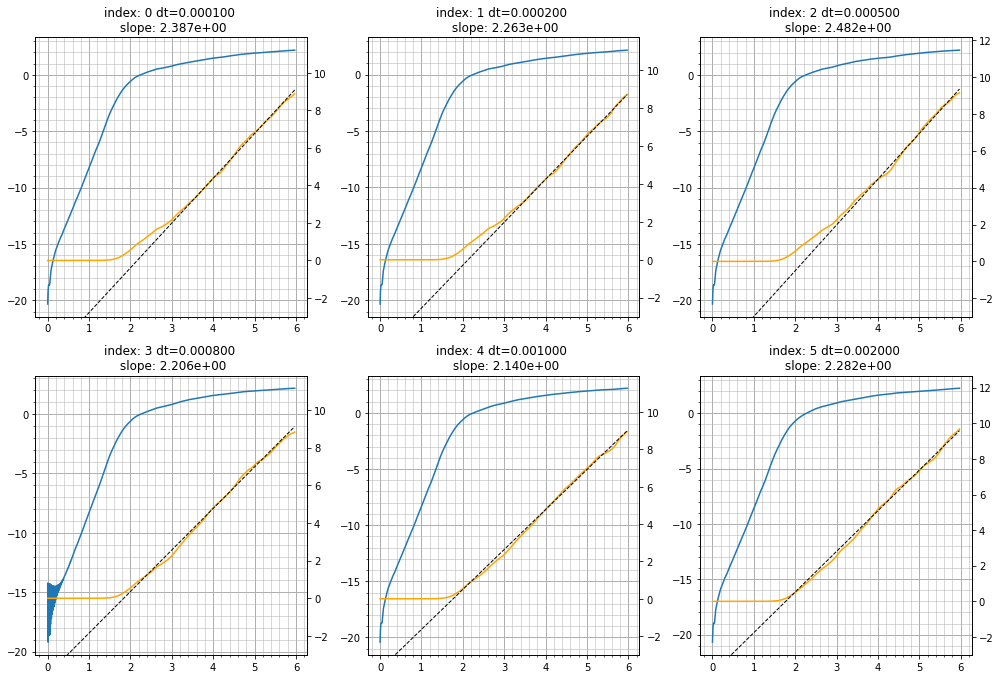

In [10]:
plt.figure(figsize=(14, 14))
dT = []
Slope = []
rs0 = np.array(histories[-1][1]["rs"])[:size]
time = np.asarray(histories[-1][1]["time"][:size])
for i,(dt, history) in enumerate(histories[:-2]):
    plt.subplot(3,3,i+1)
    
    rs = np.asarray(history["rs"])[:size]
    
    rs_r0 = ((rs - rs0)**2).sum(axis=-1).mean(axis=-1)
    plt.plot(time, np.log(rs_r0))
    plt.minorticks_on()
    plt.grid(lw=1)
    plt.grid(which="minor", lw=0.5)
    plt.twinx()
    plt.plot(time, rs_r0, c="orange")    
    ids = (time>3.5) & (time<5.8)
    slope, intercept, _,_,_ = linregress(time[ids], (rs_r0)[ids])
    plt.plot(time, time*slope + intercept, c="k", ls="--", lw=1)
    plt.ylim([rs_r0.min()-3, rs_r0.max()+3])
    plt.title("index: %d dt=%f \n slope: %0.3e"%(i, dt, slope))
    
    plt.xlabel("time")
    dT.append(dt)
    Slope.append(slope)
plt.tight_layout()

## with $(v - v_0)^2$

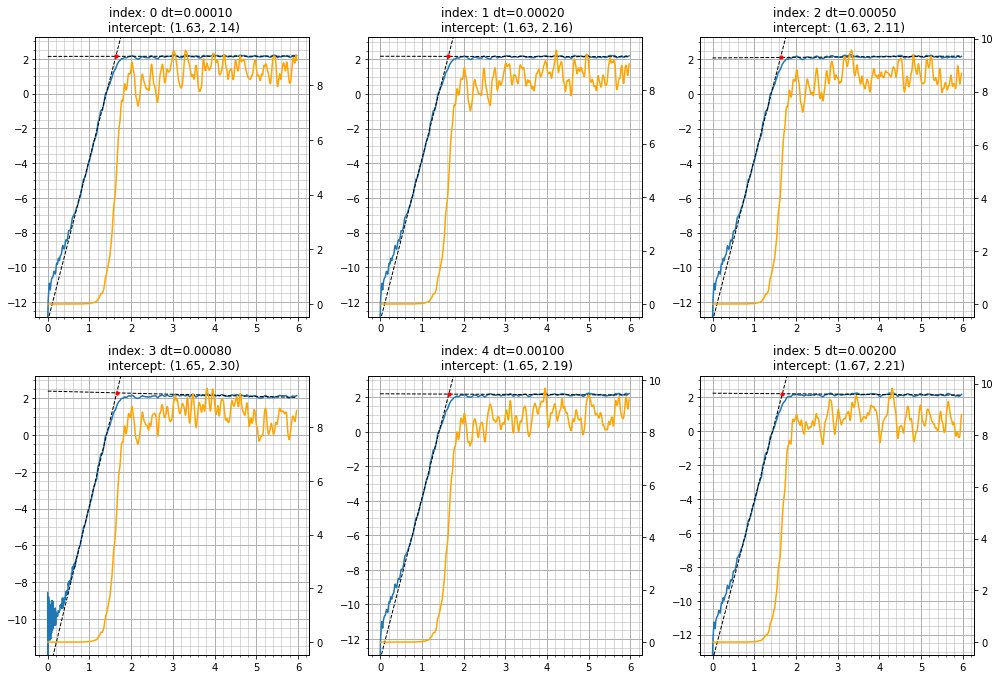

In [11]:
plt.figure(figsize=(14, 14))
vs0 = np.array(histories[-1][1]["vs"])[:size]
time = np.asarray(histories[-1][1]["time"])[:size]
Intercept = []

for i,(dt, history) in enumerate(histories[:-2]):
    if i != 7:
        plt.subplot(3,3,i+1)
    
        vs = np.asarray(history["vs"])[:size]
    
        vs_v0 = ((vs - vs0)**2).sum(axis=-1).mean(axis=-1)
    
        plt.plot(time, np.log(vs_v0))
        plt.minorticks_on()
        plt.grid(lw=1)
        plt.grid(which="minor", lw=0.5)
        plt.ylim((np.log(vs_v0).min(), np.log(vs_v0).max()+1))
        ids = (time > 3.5) & (time < 5.5)
        a1, b1, _,_,_ = linregress(time[ids], np.log(vs_v0)[ids])
        plt.plot(time, time*a1 + b1, c="k", ls="--", lw=1)
    
        ids = (time > 0.8) & (time < 1.5)

        a2, b2, _,_,_ = linregress(time[ids], np.log(vs_v0)[ids])
        plt.plot(time, time*a2 + b2, c="k", ls="--", lw=1)
    
        x_point, y_point = (b1-b2)/(a2-a1), (a2*b1-a1*b2)/(a2-a1)
        plt.scatter([x_point], [y_point], s=10, c="red", zorder=10)
        plt.title("index: %d dt=%0.5f \n intercept: (%0.2f, %0.2f)"%(i, dt, x_point, y_point))

    
        plt.twinx()
        plt.plot(time, vs_v0, c="orange")
    
        plt.xlabel("time")
        Intercept.append(x_point)

plt.tight_layout()
plt.show()

In [12]:
print(f"Dynamic memory time values: {[round(t_m, 2) for t_m in Intercept]}")

Dynamic memory time values: [1.63, 1.63, 1.63, 1.65, 1.65, 1.67]


In [13]:
mean = round(np.mean(Intercept), 2)
std = round(np.std(Intercept), 2)
print(f"Dynamic memory time: {mean} ± {std}")

Dynamic memory time: 1.64 ± 0.01
